In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#manejo de datos
import numpy as np
import pandas as pd

#visualización
import matplotlib.pyplot as plt

#correlaciones
import seaborn as sns

# train_test_split  - splitting the dataset
from sklearn.model_selection import train_test_split

#regresión

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [3]:
# cargado el conjunto de datos y he eliminado las filas con valores faltantes

crab_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset1.csv').dropna()
crab_data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset2.csv').dropna()


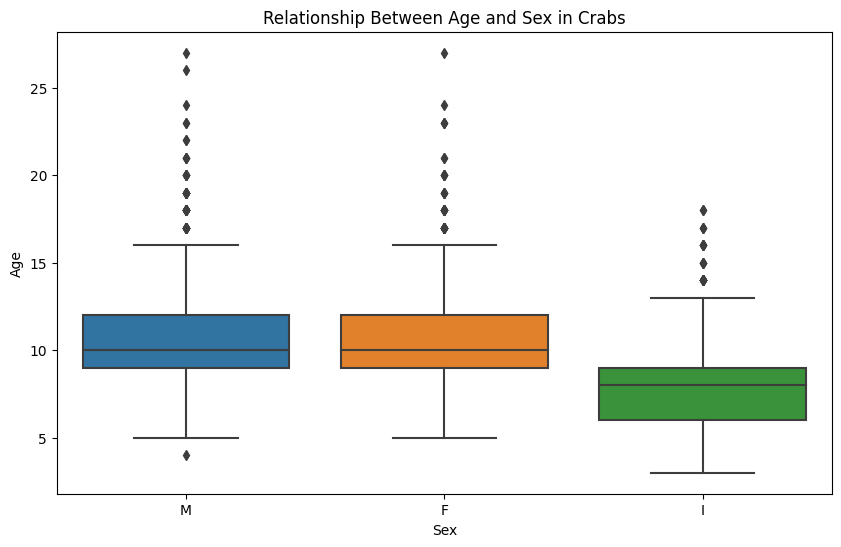

In [4]:
# Set up the plot
plt.figure(figsize=(10, 6))

# boxplot para visualizar la relación entre Age y Sex
sns.boxplot(x='Sex', y='Age', data=crab_data)

# Add title and labels
plt.title('Relationship Between Age and Sex in Crabs')
plt.xlabel('Sex')
plt.ylabel('Age')

# Show the plot
plt.show()

Los cangrejos masculinos ('M') y femeninos ('F') tienden a ser más viejos en comparación ('I').
La variabilidad en la edad es mayor para los cangrejos masculinos y femeninos en comparación con los inmaduros.

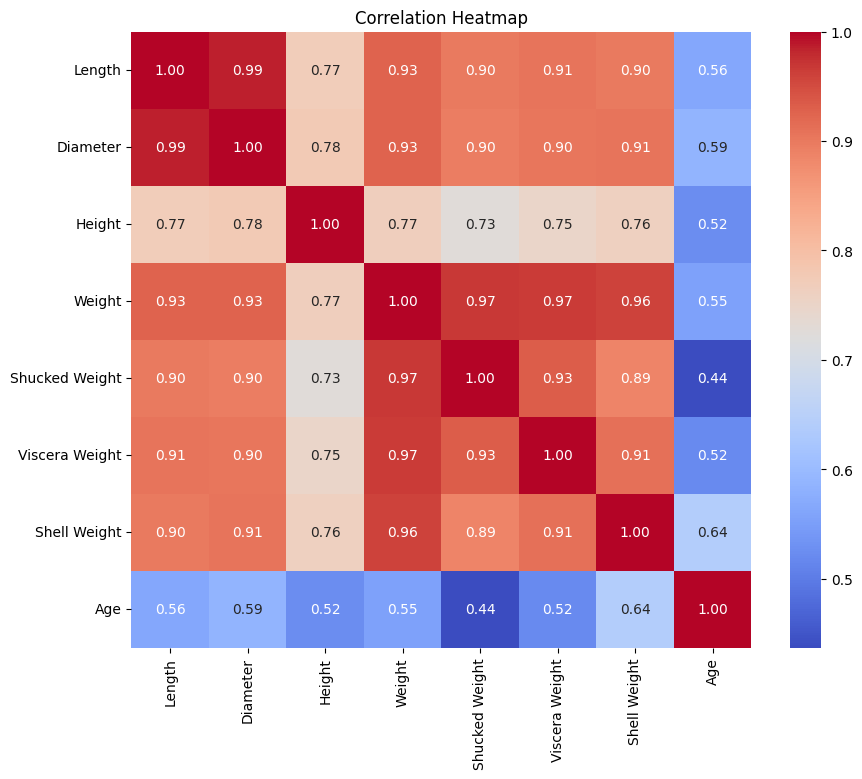

Age               1.000000
Shell Weight      0.640619
Diameter          0.585718
Length            0.564672
Weight            0.554196
Height            0.524588
Viscera Weight    0.520595
Shucked Weight    0.437340
Name: Age, dtype: float64

In [5]:
import seaborn as sns

# Calculo de la matrix de correlación
correlation_matrix = crab_data.drop(columns=['Sex']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# visualización  the correlation values with the target variable 'Age'
correlation_with_age = correlation_matrix['Age'].sort_values(ascending=False)
correlation_with_age

In [6]:
# separación de datos para  general el set validacion

X = crab_data.drop(columns=['Age'])
y = crab_data['Age']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1362, 8), (584, 8), (1362,), (584,))

Con los datos del conjunto de entrenamiento, crear gráficos de dispersión para visualizar la relación entre la edad y las demás características numéricas, utilizado diferentes colores para distinguir los datos según el sexo de los cangrejos: rojo para los indeterminados ('I'), verde para los masculinos ('M') y azul para los femeninos ('F'). En cada gráfico, puedes ver cómo varía la edad en relación con cada característica, separada por sexo.

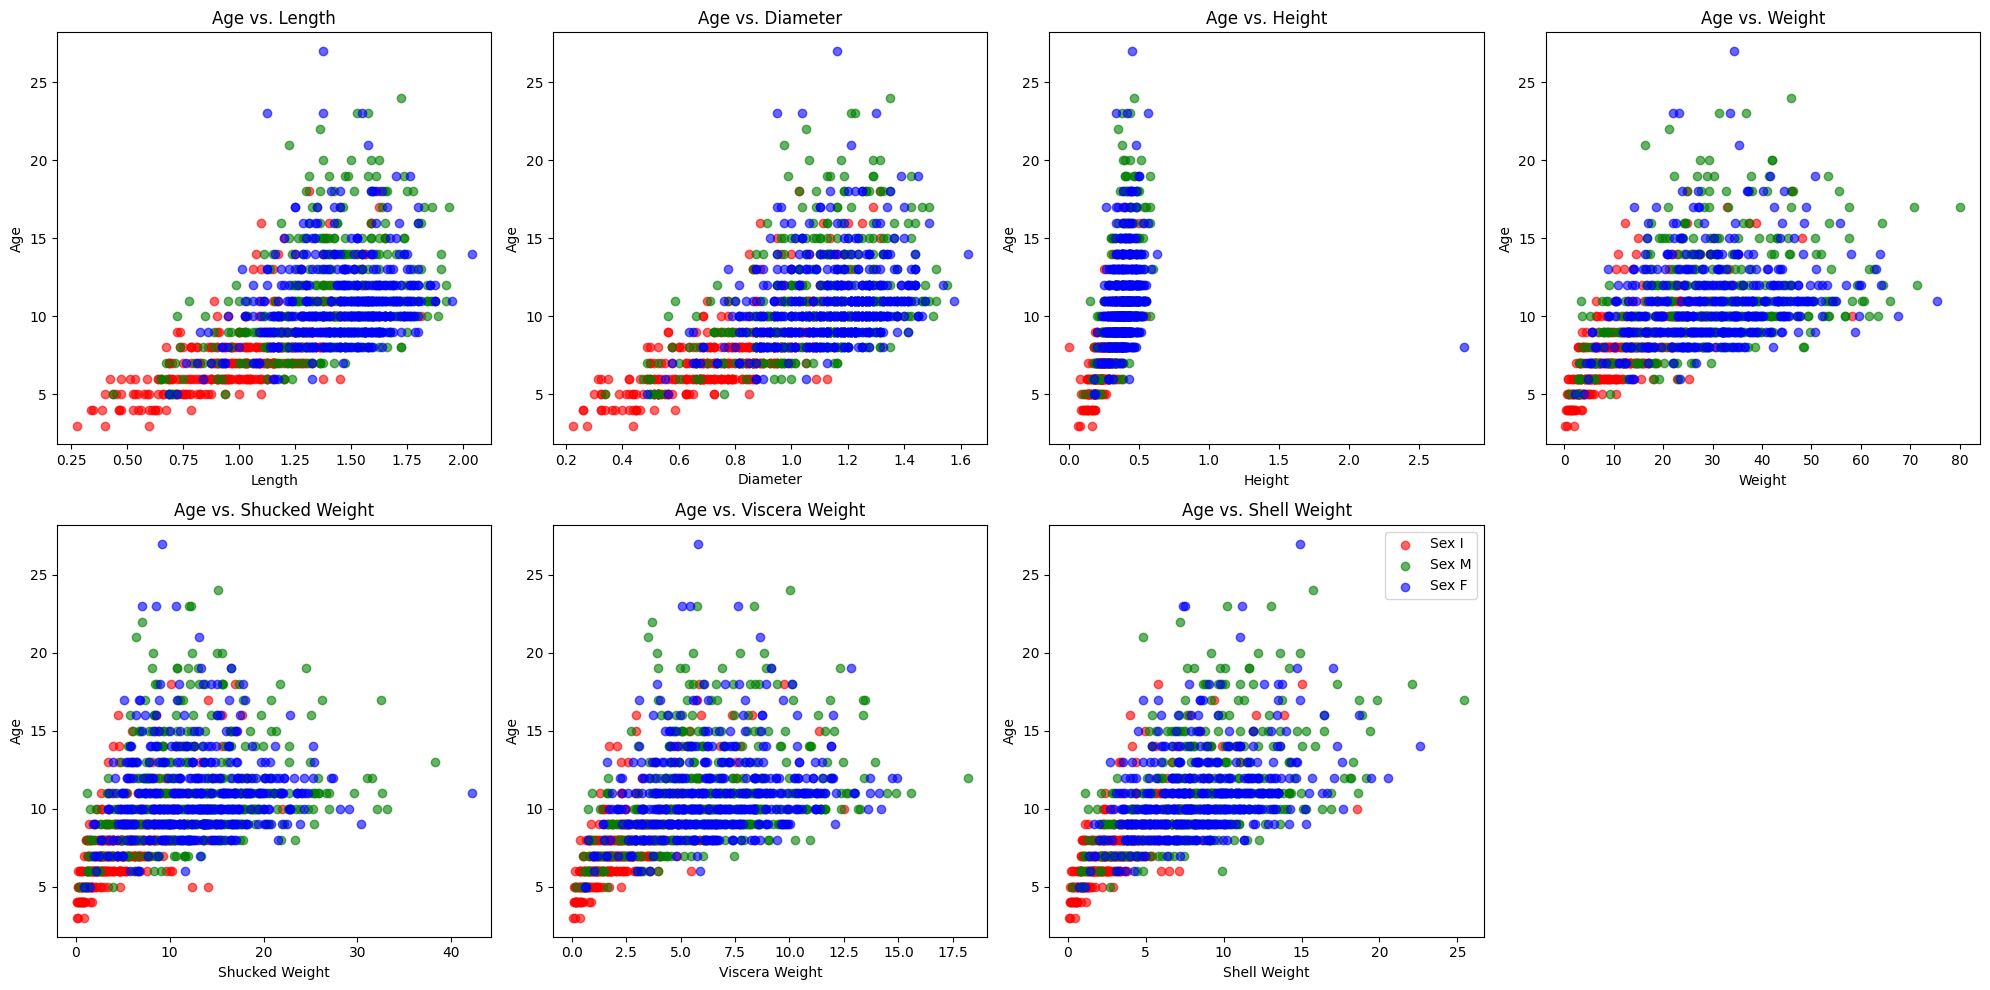

In [7]:

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the axes array
axes = axes.flatten()
color_mapping = {'I': 'red', 'M': 'green', 'F': 'blue'}

# Drop the last subplot to match the number of numerical features
fig.delaxes(axes[-1])

# Loop through each feature to plot the scatter plots
for ax, feature in zip(axes, X_train.columns[1:]):
    for sex, color in color_mapping.items():
        subset = X_train[X_train['Sex'] == sex]
        ax.scatter(subset[feature], y_train.loc[subset.index], c=color, label=f'Sex {sex}', alpha=0.6)
    ax.set_title(f'Age vs. {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Age')

axes[-2].legend()
plt.tight_layout()
plt.show()


#Selección de Modelos y Validación

Para evaluar el rendimiento de un modelo de regresión polinomial en la predicción de la edad de los cangrejos, planeamos ajustar polinomios de grados que varían de 1 a 4. Utilizaremos dos métricas clave para juzgar la efectividad del modelo: el Error Cuadrático Medio Raíz (RMSE) y el Error Absoluto Medio (MAE). Inicialmente, calcularemos estas métricas utilizando el conjunto de datos de entrenamiento para entender cómo se ajusta el modelo a los datos que se le proporcionan. Posteriormente, aplicaremos el modelo al conjunto de datos de validación para evaluar cómo generaliza a nuevos datos. Al comparar estos resultados, podremos identificar si el modelo está sobreajustando o si es capaz de hacer predicciones precisas en datos no vistos




In [8]:
# Loop through polynomial degrees 1 to 4
def model_validation(X_train,X_val, y_train,y_val ):
  rmse_train = {}
  mae_train = {}
  rmse_val = {}
  mae_val = {}
  for degree in range(1, 5):
      # Create polynomial features
      poly = PolynomialFeatures(degree=degree)
      X_train_poly = poly.fit_transform(X_train)
      X_val_poly = poly.transform(X_val)

      # Fit the model
      model = LinearRegression()
      model.fit(X_train_poly, y_train)

      # Make predictions
      y_train_pred = model.predict(X_train_poly)
      y_val_pred = model.predict(X_val_poly)

      # RMSE y MAE training set
      rmse_train[degree] = mean_squared_error(y_train, y_train_pred, squared=False)
      mae_train[degree] = mean_absolute_error(y_train, y_train_pred)

      # RMSE y MAE validation set
      rmse_val[degree] = mean_squared_error(y_val, y_val_pred, squared=False)
      mae_val[degree] = mean_absolute_error(y_val, y_val_pred)

  # Visualizacipon de datos
  results_df = pd.DataFrame({
      'Grado': list(rmse_train.keys()),
      'RMSE_Train': list(rmse_train.values()),
      'MAE_Train': list(mae_train.values()),
      'RMSE_Val': list(rmse_val.values()),
      'MAE_Val': list(mae_val.values())
  })
  return results_df


# Quitamos la columna de SEX

X_train_ns = X_train.drop(columns=['Sex'])
X_val_ns = X_val.drop(columns=['Sex'])
results_df_1=model_validation(X_train_ns,X_val_ns, y_train,y_val)
results_df_1


,Grado,RMSE_Train,MAE_Train,RMSE_Val,MAE_Val
0,1,2.185129,1.575823,2.299762,1.678385
1,2,2.023470,1.451189,2.367766,1.647014
2,3,1.908224,1.371300,5.447089,1.918332
3,4,1.621674,1.169983,9.091558,2.840364


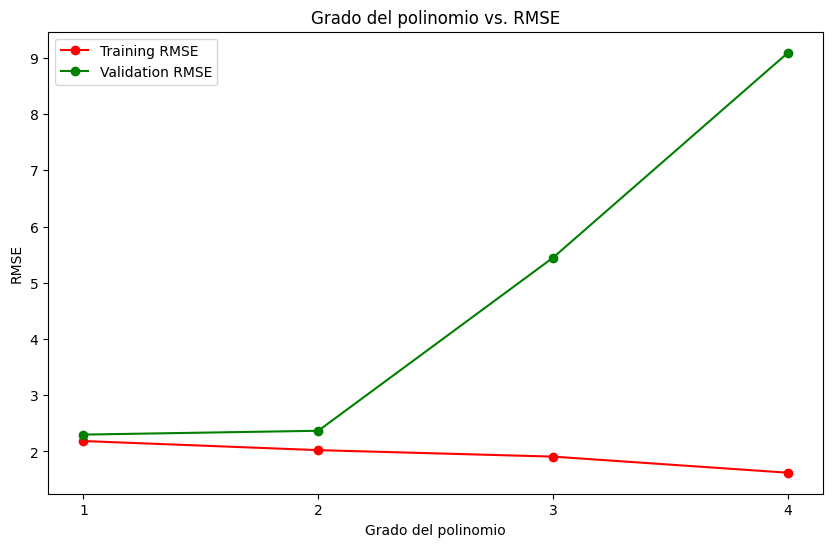

In [9]:
# visualización

def visualizar_RMSEvsGRado(results_df):
  plt.figure(figsize=(10, 6))
  # Plot RMSE
  plt.plot(results_df['Grado'], results_df['RMSE_Train'], marker='o', linestyle='-', color='red', label='Training RMSE')
  plt.plot(results_df['Grado'], results_df['RMSE_Val'], marker='o', linestyle='-', color='green', label='Validation RMSE')

  plt.title('Grado del polinomio vs. RMSE')
  plt.xlabel('Grado del polinomio')
  plt.ylabel('RMSE')
  plt.xticks(results_df['Grado'])

  # Add legend
  plt.legend()

  # Show the plot
  plt.show()

visualizar_RMSEvsGRado(results_df_1)

In [10]:
# creando nuevas caracteristicas

def calculate_new_features(df):
    df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
    df['Density'] = df['Weight'] / df['Volume']
    df['Surface_Area'] = 2 * (df['Length'] * df['Diameter'] + df['Length'] * df['Height'] + df['Diameter'] * df['Height'])
    df['Shell_to_Body_Ratio'] = df['Shell Weight'] / (df['Weight'] + df['Shell Weight'])
    df['Length_to_Diameter_Ratio'] = df['Length'] / df['Diameter']

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


crab_data_nc=calculate_new_features(crab_data)
crab_data_nc.shape



(1945, 14)

In [11]:
# Calculo con todos los cangrejos

X_nc = crab_data_nc.drop(columns=['Age','Sex'])
y_nc = crab_data_nc['Age']

X_train, X_val, y_train, y_val = train_test_split(X_nc, y_nc, train_size=0.7, random_state=42)

results_df_2=model_validation(X_train,X_val,y_train,y_val)
results_df_2

,Grado,RMSE_Train,MAE_Train,RMSE_Val,MAE_Val
0,1,2.132433,1.552936,2.309086,1.609589
1,2,1.957625,1.421495,2.469123,1.640433
2,3,1.592195,1.129904,164.529533,10.789264
3,4,0.531313,0.369771,34912.068064,1991.925124


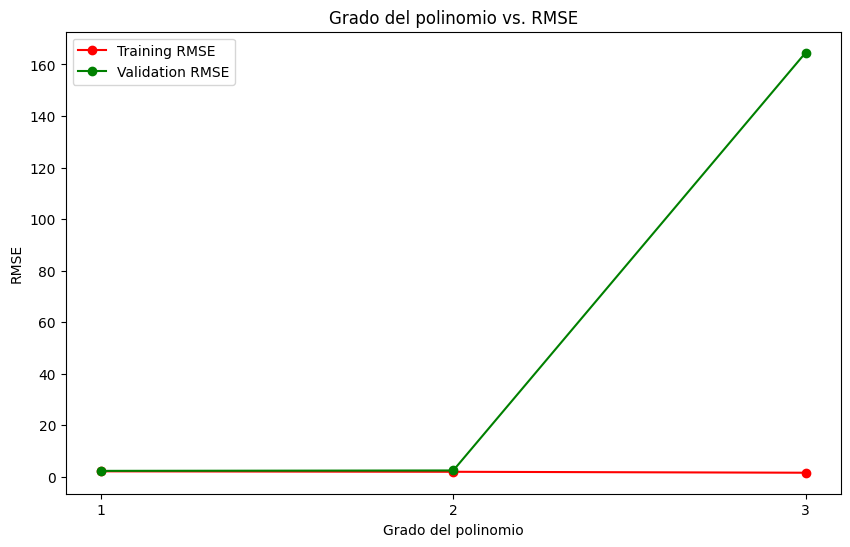

In [39]:
visualizar_RMSEvsGRado(results_df_2[0:3])

Calculamos los modelos solo con las nuevas caracteristicas

In [14]:
selected_features = ['Volume',  'Density', 'Surface_Area', 'Shell_to_Body_Ratio','Length_to_Diameter_Ratio']

#selected_features = ['Density', 'Volume', 'Surface_Area']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
results_df_3=model_validation(X_train_selected,X_val_selected,y_train,y_val)
results_df_3




,Grado,RMSE_Train,MAE_Train,RMSE_Val,MAE_Val
0,1,2.342961,1.689415,2.514845,1.736090
1,2,2.186885,1.584857,2.518928,1.708853
2,3,2.110645,1.508812,8.032454,2.063142
3,4,2.021092,1.451821,31.768263,3.333572


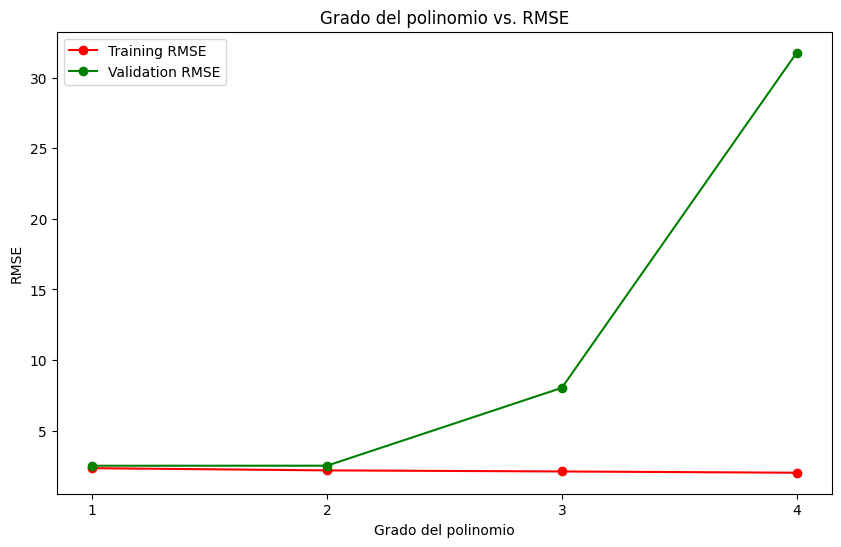

In [15]:
visualizar_RMSEvsGRado(results_df_3)

se cálcula solo para los indeterminado, se espera que tenga mejor MSE porque tiene menor variabilidad

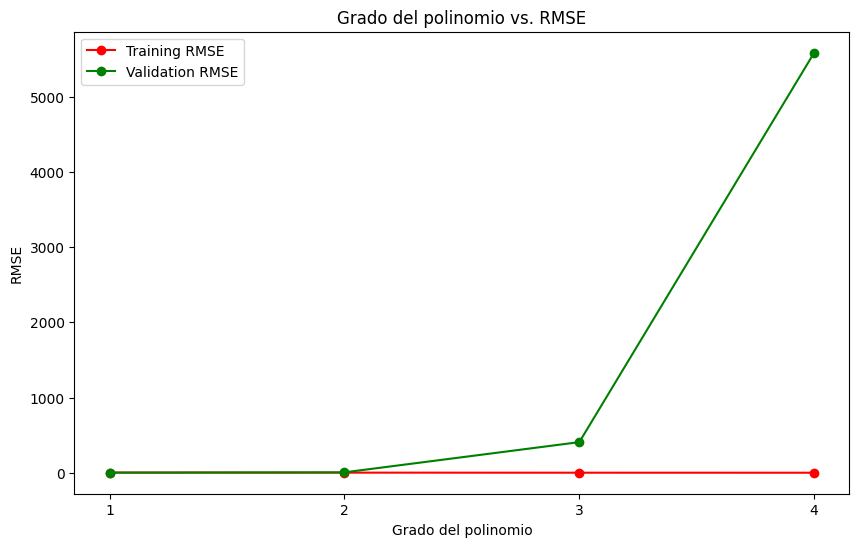

,Grado,RMSE_Train,MAE_Train,RMSE_Val,MAE_Val
0,1,1.468802e+00,1.029693e+00,1.648453,1.207092
1,2,1.136458e+00,8.375661e-01,4.980761,1.756529
2,3,2.640329e-01,1.492057e-01,406.952191,80.097779
3,4,3.456135e-07,1.847007e-07,5586.307437,701.819528


In [17]:
crab_data_nc_I = crab_data_nc[crab_data_nc['Sex'].isin(['I'])]
#crab_data_nc_I = crab_data_nc[crab_data_nc['Sex'].isin(['I', 'M'])]
X_nc = crab_data_nc_I.drop(columns=['Age','Sex'])
y_nc = crab_data_nc_I['Age']
X_train, X_val, y_train, y_val = train_test_split(X_nc, y_nc, train_size=0.7, random_state=42)

results_df_2I=model_validation(X_train,X_val,y_train,y_val)
visualizar_RMSEvsGRado(results_df_2I),
X_train.shape, X_val.shape,
results_df_2I

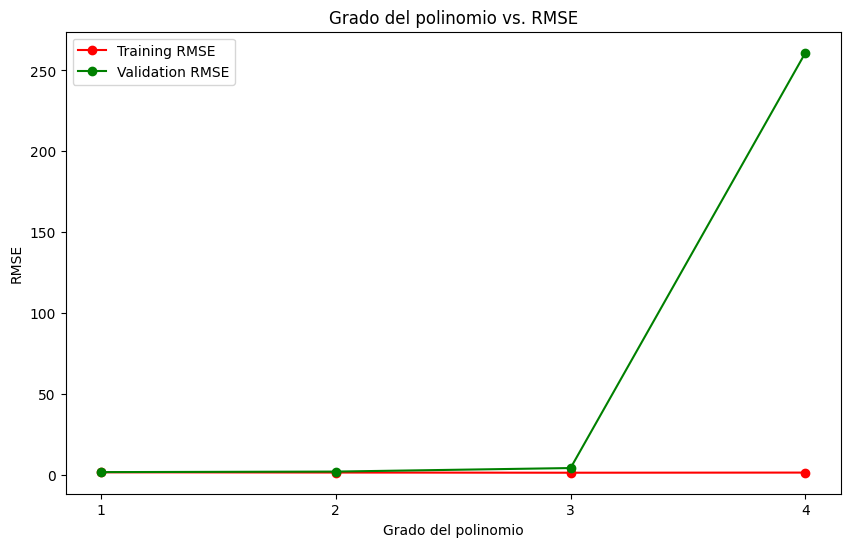

,Grado,RMSE_Train,MAE_Train,RMSE_Val,MAE_Val
0,1,1.556518,1.084188,1.659769,1.197786
1,2,1.402995,1.011694,1.994634,1.257193
2,3,1.287306,0.918853,4.177822,1.510371
3,4,1.373185,1.036060,260.979388,21.299054


In [18]:
selected_features = ['Volume',  'Density', 'Surface_Area', 'Shell_to_Body_Ratio','Length_to_Diameter_Ratio']

#selected_features = ['Density', 'Volume', 'Surface_Area']
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
results_df_3I=model_validation(X_train_selected,X_val_selected,y_train,y_val)
visualizar_RMSEvsGRado(results_df_3I),
results_df_3I


In [19]:
# cargo de datos

crab_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset1.csv').dropna()
crab_data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset2.csv').dropna()


def calculate_new_features(df):
    df['Volume'] = df['Length'] * df['Diameter'] * df['Height']
    df['Density'] = df['Weight'] / df['Volume']
    df['Surface_Area'] = 2 * (df['Length'] * df['Diameter'] + df['Length'] * df['Height'] + df['Diameter'] * df['Height'])
    df['Shell_to_Body_Ratio'] = df['Shell Weight'] / (df['Weight'] + df['Shell Weight'])
    df['Length_to_Diameter_Ratio'] = df['Length'] / df['Diameter']

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


crab_data=calculate_new_features(crab_data)
crab_data_test=calculate_new_features(crab_data_test)


X_train_val = crab_data.drop(columns=['Age','Sex'])
y_train_val = crab_data['Age']
X_test = crab_data_test.drop(columns=['Age','Sex'])
y_test = crab_data_test['Age']

selected_features = ['Volume',  'Density', 'Surface_Area', 'Shell_to_Body_Ratio','Length_to_Diameter_Ratio']
X_train_val = X_train_val[selected_features]
X_test = X_test[selected_features]


#Seleccion de polinomio
degree=2

# Transformar las características a polinomio de grado 2
poly = PolynomialFeatures(degree=degree)
X_train_val_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo en el conjunto combinado de entrenamiento y validación
model = LinearRegression()
model.fit(X_train_val_poly, y_train_val)


# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test_poly)

# Calcular RMSE y MAE
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'RMSE en el conjunto de prueba: {rmse_test}')
print(f'MAE en el conjunto de prueba: {mae_test}')



RMSE en el conjunto de prueba: 2.438102927553094
MAE en el conjunto de prueba: 1.6980453895242955
